In [1]:
import pandas_datareader as web
import datetime

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
# data from 2014 to 2018
start = datetime.datetime(2014, 9, 10)
end = datetime.datetime(2018,12,31)
df = web.DataReader('TSLA', 'yahoo', start, end) # Tesla stock data

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-10,281.410004,273.660004,279.500000,281.100006,3781300,281.100006
2014-09-11,284.790009,278.630005,280.459991,280.309998,3766100,280.309998
2014-09-12,282.390015,277.000000,280.500000,279.200012,3324600,279.200012
2014-09-15,274.399994,249.130005,274.369995,253.860001,16455400,253.860001
2014-09-16,262.459991,252.419998,255.149994,260.739990,8300100,260.739990


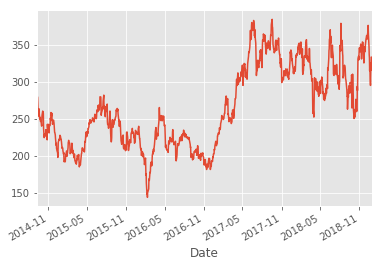

In [5]:
df['Adj Close'].plot()
plt.show()

In [6]:
len(df)

1085

## Manipulations
+ Creating 100 Moving average - takes today's price, 99 of the prior prices and creates an average of them
+ smoothing out price over time
+ E.g when the 50MA crosses over the 250MA Signals an up/down trend in Price

In [7]:
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean() # or .sum()

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2014-09-10,281.410004,273.660004,279.500000,281.100006,3781300,281.100006,281.100006
2014-09-11,284.790009,278.630005,280.459991,280.309998,3766100,280.309998,280.705002
2014-09-12,282.390015,277.000000,280.500000,279.200012,3324600,279.200012,280.203339
2014-09-15,274.399994,249.130005,274.369995,253.860001,16455400,253.860001,273.617504
2014-09-16,262.459991,252.419998,255.149994,260.739990,8300100,260.739990,271.042001


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015,318.4833
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996,318.2488
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005,317.9284
2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995,317.8472
2018-12-31,339.209991,325.260010,337.790009,332.799988,6302300,332.799988,317.3795


+ can drop NA, would lose 100 days using df.dropna(inplace= True)

In [10]:
# or rather using this method, doesnt generate NANs for the first 100 values.
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean() 

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2014-09-10,281.410004,273.660004,279.500000,281.100006,3781300,281.100006,281.100006
2014-09-11,284.790009,278.630005,280.459991,280.309998,3766100,280.309998,280.705002
2014-09-12,282.390015,277.000000,280.500000,279.200012,3324600,279.200012,280.203339
2014-09-15,274.399994,249.130005,274.369995,253.860001,16455400,253.860001,273.617504
2014-09-16,262.459991,252.419998,255.149994,260.739990,8300100,260.739990,271.042001


In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015,318.4833
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996,318.2488
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005,317.9284
2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995,317.8472
2018-12-31,339.209991,325.260010,337.790009,332.799988,6302300,332.799988,317.3795


In [13]:
# Creating matplotlib subplots 6 by 1 followed by starting point

fig, axes = plt.subplots(2,2 , figsize = (20, 10), sharex = True)
axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122) # will have its own x axis

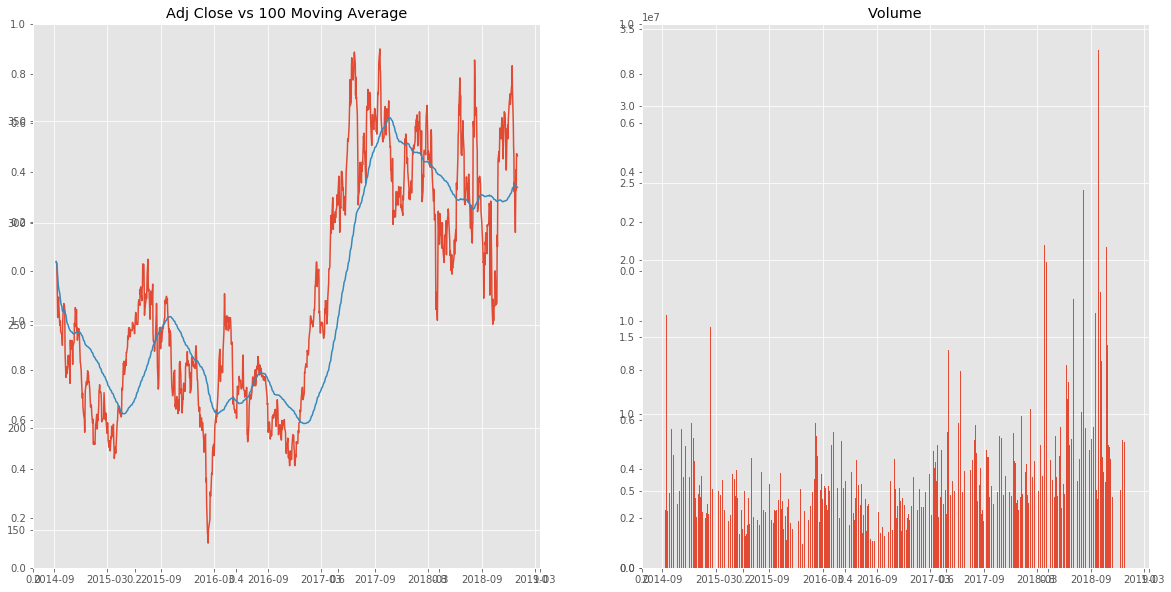

In [14]:
axes1.plot(df.index, df['Adj Close'])
axes1.plot(df.index, df['100ma'])
axes1.set_title('Adj Close vs 100 Moving Average')
axes2.bar(df.index, df['Volume'])
axes2.set_title('Volume')
plt.show()

+ For inline plots %matplotlib inline
+ Pop up plots %matplotlib qt5

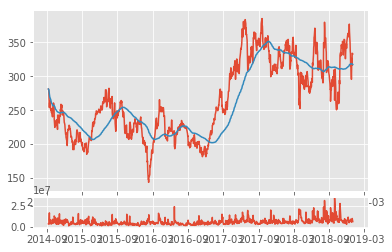

In [17]:
# Pop up window plot
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])
plt.show()

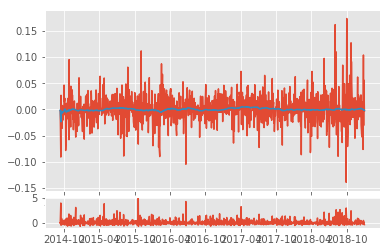

In [17]:
# Returns plot

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'].pct_change())
ax1.plot(df.index, df['100ma'].pct_change())
ax2.plot(df.index, df['Volume'].pct_change())
plt.show()

In [18]:
# resampling the data : e.g minute data to daily date
# in this case 10days resampling
# Ohlc Open high low close

df_ohlc = df['Adj Close'].resample('10D').ohlc() #Can be weekly, monthly etc. The average value over 10 days, not a MA
df_volume = df['Volume'].resample('10D').sum() # True volume over 10 days

In [19]:
print(df_ohlc.head())

                  open        high         low       close
Date                                                      
2014-09-10  281.100006  281.100006  253.860001  259.320007
2014-09-20  250.029999  252.139999  245.259995  245.259995
2014-09-30  242.679993  260.619995  240.240005  257.010010
2014-10-10  236.910004  236.910004  224.589996  227.479996
2014-10-20  230.470001  242.770004  221.669998  238.100006


In [20]:
# Creating a candlestick plot
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [21]:
# resetting the index for ohlc so that date is now a colum
df_ohlc.reset_index(inplace=True)

In [22]:
df_ohlc.head()

,Date,open,high,low,close
0,2014-09-10,281.100006,281.100006,253.860001,259.320007
1,2014-09-20,250.029999,252.139999,245.259995,245.259995
2,2014-09-30,242.679993,260.619995,240.240005,257.010010
3,2014-10-10,236.910004,236.910004,224.589996,227.479996
4,2014-10-20,230.470001,242.770004,221.669998,238.100006


In [23]:
# converting to mdates a date matplotlib can understand
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date        open        high         low       close
0  735486.0  281.100006  281.100006  253.860001  259.320007
1  735496.0  250.029999  252.139999  245.259995  245.259995
2  735506.0  242.679993  260.619995  240.240005  257.010010
3  735516.0  236.910004  236.910004  224.589996  227.479996
4  735526.0  230.470001  242.770004  221.669998  238.100006


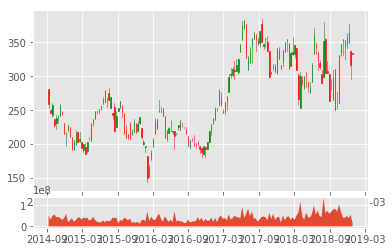

In [24]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup ='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

The OHLC candlestick graph has alot of condensed information such as direction, highs and lows

+ The S & P 500 data ( all the companies that comprise of it)
+ The top 500 companies by market cap = the number of outstanding shares multiplied by price
+ The S&P 500, or just the S&P is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE, NASDAQ, or the Cboe BZX Exchange.

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that comprise the Dow Jones Industrial Average), and covers about 80 percent of the American equity market by capitalization. The index is weighted by free-float market capitalization, so more valuable companies account for relatively more of the index. The index constituents and the constituent weights are updated regularly using rules published by S&P Dow Jones Indices. Although the index is called the S&P "500", the index contains 505 stocks because it includes two share classes of stock from 5 of its component companies

In [25]:
# Beautiful Soup Webscraper 
import bs4 as bs

In [26]:
import pickle # Serialises any python object, basically to save SP 500 list
import requests

In [27]:
# Getting the source code from wikipedia
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml') # beautifulsoup object
    table = soup.find('table', {'class': 'wikitable sortable'}) # Uses Soup to find the S & P 500 list
    tickers = []
    for row in table.findAll('tr')[1:]: # Each table row without the title
        ticker = row.findAll('td')[0].text
        ticker= ticker[:-1]
        tickers.append(ticker)
        
        
    with open("sp500tickers.pickle", 'wb') as f:
        pickle.dump(tickers, f)
        
    print(tickers)    
    return tickers

#save_sp500_tickers()

In [ ]:
# Getting the source code from slickcharts
def save_sp500_companies_tickers():
    resp = requests.get('https://www.slickcharts.com/sp500'')
    soup = bs.BeautifulSoup(resp.text, 'lxml') # beautifulsoup object
    table = soup.find('table', {'class': 'table table-hover table-borderless table-sm'}) # Uses Soup to find the S & P 500 list
    tickers_2 = []
    company = []
                        
    for row in table.findAll('tr')[1:]: # Each table row without the title
        ticker1 = row.findAll('td')[2].text
        ticker1 = ticker1[:-1]
        tickers.append(ticker1)
                        
        company1 = row.findAll('td')[1].text
        company1 = company1[:-1]
        company.append(company1)
        
        
    with open("sp500tickers_2.pickle", 'wb') as f:
        pickle.dump(tickers_2, f)
        
    with open("sp500company.pickle", 'wb') as b:
        pickle.dump(company, b)
                        
    print(tickers_2)   
    print(company)
    return tickers_2, company

#save_sp500_companies_tickers()

In [28]:
# Workin with the list of SPM 500 companies
# working with the company's data
import os
import pandas as pd

In [29]:
# Taking the Entire dataset from yahoo and storing it locally on my pc.
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS'):
        os.makedirs('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS')
        
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/{}.csv'.format(ticker)):
            df = web.DataReader(ticker.replace('.','-'), 'yahoo', start)
            df.to_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/{}.csv'.format(ticker))
        else:
            print('Already have ()'.format(ticker))
            
#get_data_from_yahoo() 

In [30]:
# Compiling all the data frames  Adj Close for all
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame() # empty dataframe object
    # begin iterating through the tickers we have instead of the files in the directory
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close':ticker}, inplace = True) # changing name to organisation name
        df.drop(['Open','High','Low','Close','Volume'], axis = 1, inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how = 'outer')
            
        if(count % 10 == 0):
            print(count)
            
    print(main_df.head())
    main_df.to_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/sp500_joined_closes.csv')  

#compile_data()

In [ ]:
# Compiling all the data frames into 1 huge data set sp_500_ALL
def compile_data2():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df2 = pd.DataFrame() # empty dataframe object
    # begin iterating through the tickers we have instead of the files in the directory
    for count, ticker in enumerate(tickers):
        df2 = pd.read_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/{}.csv'.format(ticker))
        df2.set_index('Date', inplace = True)
        
        #df.rename(columns = {'Adj Close':ticker}, inplace = True) # changing name to organisation name
        #df.drop(['Open','High','Low','Close','Volume'], axis = 1, inplace = True)
        df2['company'] = ticker
        
        if main_df2.empty:
            main_df2 = df2
        else:
            main_df2 = main_df2.join(df2, how = 'outer')
            
        if(count % 10 == 0):
            print(count)
            
    print(main_df2.head())
    main_df2.to_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/sp500_ALL.csv')  

#compile_data2()

In [31]:
import numpy as np

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.530853  0.379924  0.236696  0.568110  0.336124  0.453284   
ABT   0.530853  1.000000  0.466697  0.345339  0.533021  0.368173  0.489134   
ABBV  0.379924  0.466697  1.000000  0.258642  0.340505  0.225730  0.326083   
ABMD  0.236696  0.345339  0.258642  1.000000  0.296940  0.298792  0.358029   
ACN   0.568110  0.533021  0.340505  0.296940  1.000000  0.416387  0.535599   

           AMD       AAP       AES  ...      WLTW      WYNN       XEL  \
MMM   0.208847  0.213832  0.312920  ...  0.422347  0.249808  0.241891   
ABT   0.258922  0.272114  0.316075  ...  0.372760  0.263762  0.196792   
ABBV  0.151739  0.197712  0.190500  ...  0.266394  0.211309  0.124419   
ABMD  0.179351  0.152756  0.121791  ...  0.211436  0.180463  0.031151   
ACN   0.242345  0.246343  0.315903  ...  0.434853  0.276604  0.205865   

           XRX      XLNX       XYL       YUM       ZBH      ZION       ZTS  
MMM   0.374733 

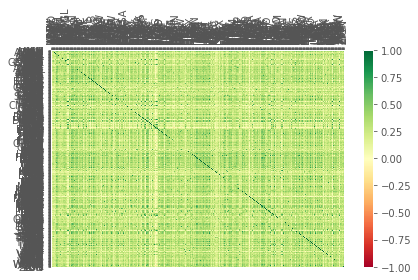

In [32]:
# Using the newly created sp500_joined_closes.csv 
def visualize_data():
    df = pd.read_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/sp500_joined_closes.csv')
    
    #df_corr = df.corr()
    df.set_index('Date', inplace=True) 
    df_corr = df.pct_change().corr() #Correlation of returns
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

visualize_data()

+ Depending on what kind of investor you are
+ the correlation betweeen companies can help determine where to invest your money


### Machine Learning 
+ Within the next seven days did the price go up more than 2%
+ If yes -> Gain(Buy), If No -> Fall(Sell), neither gain or fall -> Hold

In [33]:
# each model will be Per company basis
# each company takes into account of all other companies within the S & P 500

def process_data_for_labels(ticker):
    days = 7 # Number of days
    df = pd.read_csv('C:/Users/Olatomiwa/Documents/SOL PLAATJE UNIVERSITY/HONOURS 2019/RESEARCH/STOCK_DFS/sp500_joined_closes.csv', index_col = 0)
    tickers = df.columns.values #.tolist() not necessary
    df.fillna(0, inplace = True)
    
    for i in range(1, days + 1):
        # Company name and days into the future
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker] 
        # .shift shifts up to get the future value old - new divided by 
        
    df.fillna(0, inplace = True)
    return tickers, df

process_data_for_labels('MMM')

(array(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
        'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
        'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL',
        'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT',
        'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS',
        'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM',
        'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO',
        'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX',
        'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP',
        'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB',
        'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS',
        'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR',
        'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO',
        'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', '

### Creating a new TARGET column 'Buy'(gain) 'Sell'(fall) 'Hold'(neither)
+ feature sets would be the percent change pricing information for all companies
+ wii be using rolling and applying functions
+ Buy and sell seems much better since its binary

In [34]:
# takes the 7 day percent changes for the prices in the future
def buy_sell_hold(*args): # *args lets us pass any parameters, any number of arguments which becomes an iterable
    cols = [c for c in args] # passing each column mapping it row wise
    requirement = 0.02 # if the stock price changes by 2%
    for col in cols:
        if(col > requirement):
            return(1)   # GAIN
        if(col < -requirement):
            return(-1)  # FALL
    return(0) # if both statements are false therefore Hold


+ Mapping the function to a dataframel to create a new target column

In [35]:
from collections import Counter

In [36]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    days = 7 # Number of days
    
    # The new column will have the mapped answer of buy_sell_hold
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold, *[df['{}_{}d'.format(ticker, i)]for i in range(1, days+1)]))
    
    vals = df['{}_target'.format(ticker)].values #.tolist optional 
    str_vals = [str(i) for i in vals]
    
    print('Data spread: ', Counter(str_vals)) # seeing th way in which buys/sell/hold are distributed
    df.fillna(0, inplace = True) # replacing prior nans with 0 (percent change)
    
    df = df.replace([np.inf, -np.inf], np.nan) # replacing infinite changes with nan
    df.dropna(inplace = True)
    
    # creating the feature sets and target labels (pct_change() is basically normalising the prices as regards to one day)
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace = True)
    
    # x_features and y_target
    
    x_features = df_vals.values 
    y_target = vals
    
    return x_features, y_target, df

extract_featuresets('MMM')

Data spread:  Counter({'0': 532, '1': 374, '-1': 279})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00200512, -0.00792519,  0.0115402 , ...,  0.        ,
          0.00480289,  0.00082803],
        [-0.00283998, -0.00023499,  0.00051869, ...,  0.        ,
          0.00990087, -0.00248127],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.00826801,
         -0.00786371,  0.00546987],
        [ 0.        ,  0.        ,  0.        , ..., -0.01033437,
         -0.01078815, -0.00048575],
        [ 0.        ,  0.        ,  0.        , ...,  0.00491398,
          0.0091253 , -0.00476235]]),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
                    MMM        ABT       ABBV       ABMD        ACN       ATVI  \
 Date                                                                            
 2014-09-10  127.953064  38.780457  47.906025  24.830000  72.614571  22.932846   
 2014-09-11  127.696503  38.473114  48.458870  25.280001  72.882828  22.990637   

### Feeding the data into a classifyer

In [38]:
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

+ Crossvalidation for shuffling the data
+ Voting Classifiers to see which ones are best

In [40]:
# Machine Learning function
def do_ml(ticker):
    features, target, df = extract_featuresets(ticker)
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, stratify = target)
    
    # x_train is the percent change
    classifier = neighbors.KNeighborsClassifier()
    classifier.fit(x_train, y_train)
    
    confidence = classifier.score(x_test, y_test)
    print('Accuracy', confidence)
    
    predictions = classifier.predict(x_test)
    print('Prediction Spread: ', Counter(predictions))
    
    return(confidence)

# Testing with a single company's stock
do_ml('BAC')

Data spread:  Counter({'1': 464, '-1': 426, '0': 295})
Accuracy 0.4377104377104377
Prediction Spread:  Counter({-1: 170, 1: 98, 0: 29})


0.4377104377104377

A voting Classifier consisting of multiple classifiers that will vote on which one is best, Consists of:
+ Linear Support Vector Classifier
+ K-Neighbors Classifier
+ Random Forest

In [43]:
def do_ml_vote(ticker):
    features, target, df = extract_featuresets(ticker)
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, stratify = target)
    
    # x_train is the percent change
    classifier = VotingClassifier([('lvsc', svm.LinearSVC()),
                                   ('knn', neighbors.KNeighborsClassifier()),
                                   ('rfor', RandomForestClassifier())])
    
    classifier.fit(x_train, y_train)
    
    confidence = classifier.score(x_test, y_test)
    print('Accuracy', confidence)
    
    predictions = classifier.predict(x_test)
    print('Prediction Spread: ', Counter(predictions))
    
    return(confidence)

# Testing with a single company's stock
do_ml_vote('BAC')

Data spread:  Counter({'1': 464, '-1': 426, '0': 295})


C:\Users\Olatomiwa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy 0.4478114478114478
Prediction Spread:  Counter({-1: 189, 1: 84, 0: 24})


C:\Users\Olatomiwa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.4478114478114478